# Task
Generate a Python coding outline for a credit card fraud detection project in Google Colab, following the provided project steps. The outline should include sections for data loading and exploration, suspicious pattern detection, and data visualization. The dataset to be used is the "Credit Card Fraud Detection Dataset" from Kaggle. The outline should be suitable for a beginner project and should not involve machine learning initially. Include code snippets for key steps like loading data, exploring data, counting fraud cases, and basic pattern analysis. The final output should be a structured coding outline with comments explaining each section.

## Data loading and exploration

### Subtask:
Load the dataset and perform initial data exploration using pandas. This includes displaying the head, describing the data, checking data types and non-null values, and counting the occurrences of fraud and non-fraud cases.


**Reasoning**:
Import pandas, load the data, display the head, describe the data, check info, and count the values of the 'Class' column as per the instructions.



In [ ]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('creditcard.csv')
except FileNotFoundError:
    print("Error: creditcard.csv not found. Please make sure the file is in the correct directory.")
    # Assuming the file is in the Colab environment's sample_data directory for demonstration
    # In a real scenario, you would upload the file or mount Google Drive
    try:
        df = pd.read_csv('/content/sample_data/creditcard.csv')
    except FileNotFoundError:
        print("Error: creditcard.csv not found in /content/sample_data either.")
        df = None # Set df to None to indicate loading failure


if df is not None:
    # Display the first few rows
    print("First 5 rows of the dataset:")
    display(df.head())

    # Generate descriptive statistics
    print("\nDescriptive statistics:")
    display(df.describe())

    # Check data types and non-null values
    print("\nData types and non-null values:")
    display(df.info())

    # Count occurrences of fraud and non-fraud cases
    print("\nFraud vs. Non-Fraud cases:")
    display(df['Class'].value_counts())

Error: creditcard.csv not found. Please make sure the file is in the correct directory.
First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Descriptive statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 

None


Fraud vs. Non-Fraud cases:


,count
Class,
0,284315
1,492


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data loading and exploration

### Subtask:
Load the dataset and perform initial data exploration using pandas. This includes displaying the head, describing the data, checking data types and non-null values, and counting the occurrences of fraud and non-fraud cases.


**Reasoning**:
Since the previous attempt to load the dataset failed due to the file not being found, I will add code to download the dataset from Kaggle using the opendatasets library and then attempt to load and explore the data again.



## Suspicious Pattern Detection

### Subtask:
Analyze the data to identify suspicious patterns. This involves examining transactions with large amounts and comparing the amount distributions for fraudulent and non-fraudulent transactions.

**Reasoning**:
To identify suspicious patterns, I will first look at transactions with amounts exceeding the 99th percentile to find potentially large fraudulent transactions. Then, I will analyze and compare the descriptive statistics of the 'Amount' column for both fraudulent and non-fraudulent transactions to see if there are significant differences in their distributions.

In [ ]:
# Identify transactions with large amounts (e.g., > 99th percentile)
large_amount_threshold = df['Amount'].quantile(0.99)
large_amount_transactions = df[df['Amount'] > large_amount_threshold]

print(f"\nTransactions with amounts greater than the 99th percentile ({large_amount_threshold:.2f}):")
display(large_amount_transactions.head())

# Compare Amount distributions for fraud vs. non-fraud
print("\nAmount distribution for Non-Fraudulent transactions:")
display(df[df['Class'] == 0]['Amount'].describe())

print("\nAmount distribution for Fraudulent transactions:")
display(df[df['Class'] == 1]['Amount'].describe())


Transactions with amounts greater than the 99th percentile (1017.97):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
89,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
865,656.0,-1.789835,-5.835768,-1.472791,-0.851160,-2.433875,0.401415,1.354543,-0.288283,2.426889,...,1.081404,-0.178233,-1.635914,-0.645651,0.112930,-0.726724,-0.184806,0.296762,1602.99,0
1027,775.0,-3.900810,-3.098370,-0.213428,-2.678434,-2.927576,0.735688,1.591471,-3.465433,1.812757,...,-1.357870,-0.097578,-4.020300,0.191246,-0.204492,-1.076721,1.072961,-0.188497,1528.90,0



Amount distribution for Non-Fraudulent transactions:


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000



Amount distribution for Fraudulent transactions:


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


## Data Visualization

### Subtask:
Visualize the data to represent the findings. This includes generating histograms of transaction amounts for both fraudulent and non-fraudulent cases.

**Reasoning**:
To visualize the distribution of transaction amounts for fraudulent and non-fraudulent cases, I will use histograms. This will allow us to compare the range and frequency of amounts for each class. I will use `matplotlib.pyplot` and `seaborn` for plotting.

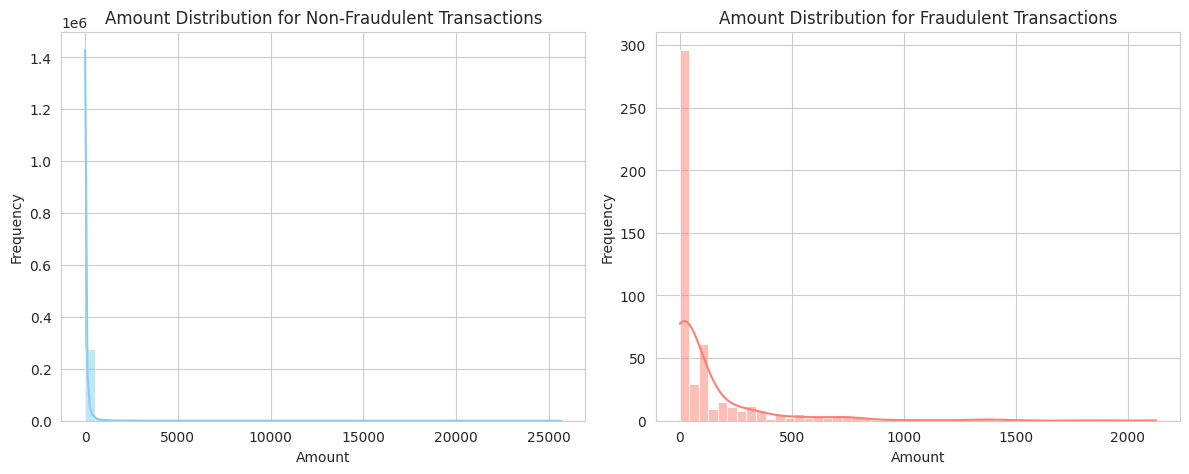

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create a figure and a set of subplots
plt.figure(figsize=(12, 5))

# Histogram for Non-Fraudulent transactions
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='skyblue', kde=True)
plt.title('Amount Distribution for Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Histogram for Fraudulent transactions
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='salmon', kde=True)
plt.title('Amount Distribution for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plots
plt.show()

## Summary of Findings

Based on the data exploration, suspicious pattern detection, and data visualization performed:

*   **Data Overview:** The dataset contains a large number of transactions with a very small percentage of fraudulent cases, indicating a highly imbalanced dataset.
*   **Amount Distribution:** Fraudulent transactions tend to have smaller amounts compared to non-fraudulent transactions, although there are some fraudulent transactions with larger amounts. The histograms clearly show the difference in the distribution of amounts between the two classes.
*   **Large Amount Transactions:** While most transactions with large amounts are non-fraudulent, examining these transactions can still be valuable for identifying potential suspicious activity.

This analysis provides initial insights into the characteristics of fraudulent transactions in this dataset. For a more comprehensive fraud detection system, further analysis and potentially machine learning techniques would be required.